In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import os

import os, sys
dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.abspath(os.path.join(dirPath, '../../', 'packages'))
print("Package path:", packagesPath)
dataPath = os.path.abspath(os.path.join(dirPath, '../../', 'data'))
print("Data path:", dataPath)
outputPath = os.path.abspath(os.path.join(dirPath, '../../', 'output'))
print("Output path:", outputPath)

if not packagesPath in sys.path:
    sys.path.append(packagesPath)

Package path: /notebooks/packages
Data path: /notebooks/data
Output path: /notebooks/output


In [3]:
# Create state dictionary

import text_generator.markov as markov
import glob

train = True
#datasetPath =  os.path.abspath(os.path.join(dataPath, "Data-Obama/*.*"))
datasetPath =  os.path.abspath(os.path.join(dataPath, "brexit/1_content.txt"))

print(datasetPath)
keyLen = 2
fileList = []
#dictionaryFilePath = os.path.abspath(os.path.join(outputPath, "data_obama.txt"))
dictionaryFilePath = os.path.abspath(os.path.join(outputPath, "brexit.txt"))
print(dictionaryFilePath)
if train :
    fileList += glob.glob(datasetPath)
    print("Input files")
    print(fileList)
    markovObj = markov.Markov(keyLen)


    for file in fileList:
        print(file)
        try:
            markovObj.readFile(file, "utf-8")
        except:
            markovObj.readFile(file, "windows-1252")

    markovObj.outputDict(dictionaryFilePath)

    print( "Generated Markov dictionary %s with processing %s input lines and %s input words " % ( dictionaryFilePath, str(markovObj.getLineCount()), str(markovObj.getWordCount()) ) )


/notebooks/data/brexit/1_content.txt
/notebooks/output/brexit.txt
Input files
['/notebooks/data/brexit/1_content.txt']
/notebooks/data/brexit/1_content.txt
Generated Markov dictionary /notebooks/output/brexit.txt with processing 38 input lines and 892 input words 


In [4]:
maxWordInSentence = 50
genNSentences = 2
outputText = []


markovObj1 = markov.Markov(dictFile=dictionaryFilePath, maxWordInSentence= maxWordInSentence)

for _ in range( genNSentences ):
    text = markovObj1.genText() 
    #print( text )
    if len(text) <= 140 and text.endswith('.'):
        outputText.append(text)

print("\n\n")
print(outputText)

Loaded dictionary file:/notebooks/output/brexit.txt



['"Funding should be based on the needs of an incompetent Tory PM to "show us the money\' row.']


In [5]:
import lc

fileContent = ''
with open(datasetPath, "r", encoding='utf-8') as file:
    fileContent = " ".join(file)
    


----------------------
Total local vocab:  163
Filtered local vocab:  32
----------------------
Total local vocab:  285
Filtered local vocab:  56
After saving


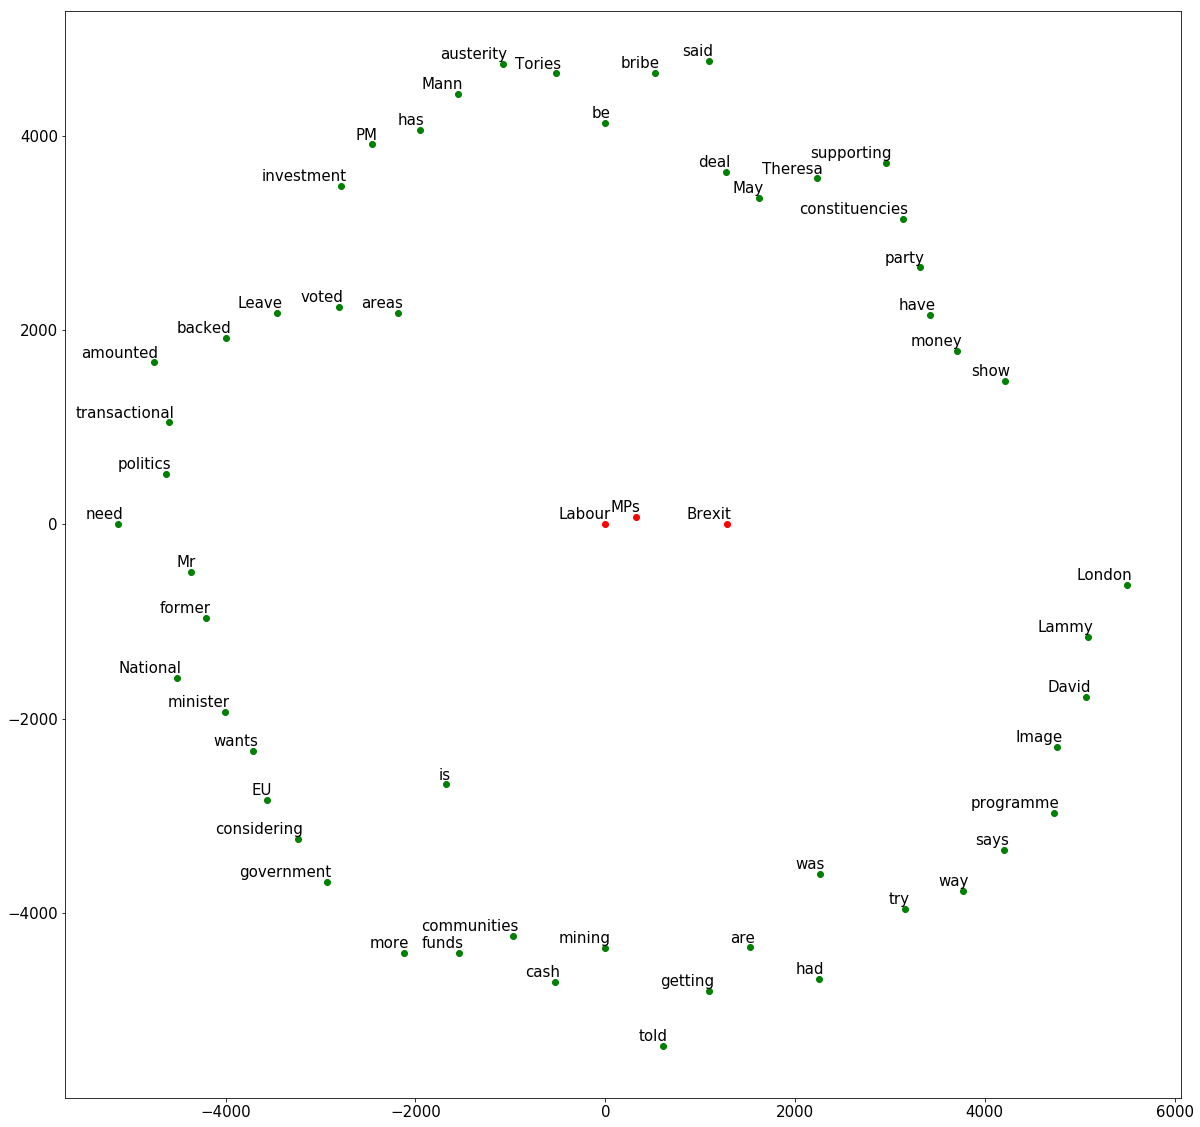

In [6]:
#allowedTypes = ['NN', 'NNP', 'NNS', 'NNPS']
allowedTypes = ['NN', 'NNP', 'NNS', 'NNPS', 'JJ', 'JJR', 'JJS' 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
peripheralProcessor = lc.Peripheral(fileContent)
peripheralProcessor.setAllowedPosTypes(allowedTypes)
peripheralProcessor.setPositionContributingFactor(1)
peripheralProcessor.setOccuranceContributingFactor(1)
peripheralProcessor.setProperNounContributingFactor(1)
peripheralProcessor.setTopScorePercentage(0.6)
peripheralProcessor.setFilterWords(0.1)
peripheralProcessor.loadSentences(fileContent)
peripheralProcessor.loadFilteredWords()
peripheralProcessor.train()
peripheralProcessor.displayPlot(outputPath + '/brexit-peripheral.png')